<span style="font-size:60px; text-align: center; display: block;"><b>Plano de Trabalho - Projeto Interconnect</b></span>


# Contextualização do Problema

- A operadora Interconnect precisa prever a rotatividade de clientes
- O objetivo é identificar clientes propensos a trocar de operadora para oferecer promoções/planos especiais
- Os dados incluem informações pessoais e contratuais dos clientes

# Etapas do Projeto
## Preparação e Análise dos Dados

- Importar os dados das diferentes fontes (contract.csv, personal.csv, internet.csv, phone.csv)
- Analisar valores ausentes e duplicados
- Realizar análise exploratória dos dados (EDA)
- Verificar correlações entre variáveis
- Identificar padrões relevantes para rotatividade

## Pré-processamento

- Tratar valores ausentes e duplicados
- Realizar codificação de variáveis categóricas
- Normalizar/padronizar dados numéricos
- Unificar os dados das diferentes fontes (contract.csv, personal.csv, internet.csv, phone.csv)
- Separar features e target
- Dividir dados em conjuntos de treino e teste

## Modelagem

- Testar diferentes algoritmos de classificação (por exemplo: Árvore de Decisão, Random Forest, Regressão Logística)
- Realizar validação cruzada
- Ajustar hiperparâmetros dos modelos
- Avaliar performance usando AUC-ROC como métrica principal
- Comparar resultados entre modelos

## Avaliação e Otimização

- Analisar métricas de desempenho (AUC-ROC, Acurácia)
- Identificar features mais importantes
- Otimizar modelo com melhor performance
- Validar se atende critério AUC-ROC ≥ 0.75

## Documentação e Relatório

- Documentar todas as etapas realizadas
- Apresentar análises e insights obtidos
- Descrever metodologia utilizada
- Apresentar resultados e conclusões
- Fazer recomendações para implementação

# Critérios de Sucesso

- AUC-ROC mínimo de 0.75
- Acurácia como métrica secundária
- Modelo interpretável e implementável
- Documentação clara e completa

<b>Bibliotecas</b>

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings

<span style="font-size:20px"><b>Preparação e Análise dos Dados:</b></span>

In [2]:
# Definindo os caminhos dos arquivos
path_contract = 'final_provider/contract.csv'
path_internet = 'final_provider/internet.csv'
path_personal = 'final_provider/personal.csv'
path_phone = 'final_provider/phone.csv'

# Importando os dados
df_contract = pd.read_csv(path_contract)
df_internet = pd.read_csv(path_internet)
df_personal = pd.read_csv(path_personal)
df_phone = pd.read_csv(path_phone)

# Análise inicial de cada DataFrame
print("\nAnálise do DataFrame Contract:\n")
print(df_contract.info())
print("\nPrimeiras linhas:")
print(df_contract.head())
print("\nValores ausentes:")
print(df_contract.isna().sum())
print("\nValores duplicados:")
print(df_contract.duplicated().sum())
print("-" *100)

print("\nAnálise do DataFrame Internet:\n")
print(df_internet.info())
print("\nPrimeiras linhas:")
print(df_internet.head())
print("\nValores ausentes:")
print(df_internet.isna().sum())
print("\nValores duplicados:")
print(df_internet.duplicated().sum())
print("-" *100)

print("\nAnálise do DataFrame Personal:\n")
print(df_personal.info())
print("\nPrimeiras linhas:")
print(df_personal.head())
print("\nValores ausentes:")
print(df_personal.isna().sum())
print("\nValores duplicados:")
print(df_personal.duplicated().sum())
print("-" *100)

print("\nAnálise do DataFrame Phone:\n")
print(df_phone.info())
print("\nPrimeiras linhas:")
print(df_phone.head())
print("\nValores ausentes:")
print(df_phone.isna().sum())
print("\nValores duplicados:")
print(df_phone.duplicated().sum())
print("-" *100)
print("-" *100)



Análise do DataFrame Contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Primeiras linhas:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No   

<b>Análise Inicial dos Dados</b>
<b>1. DataFrame Contract (7043 registros)</b>

Pontos de atenção:

- TotalCharges está como 'object' em vez de numérico;
- EndDate tem valores 'No' e datas no formato timestamp;
- BeginDate está como 'object' mas contém datas;
- Todos os registros têm dados (sem valores nulos);
- MonthlyCharges está corretamente como float64.



<b>2. DataFrame Internet (5517 registros)</b>

Pontos de atenção:

- Menor número de registros que Contract (1526 clientes sem internet);
- Todas as colunas são categóricas (object);
- Serviços disponíveis: DSL e Fiber optic;
- Sem valores nulos;
- Múltiplos serviços adicionais (OnlineSecurity, OnlineBackup, etc.).



<b>3. DataFrame Personal (7043 registros)</b>

Pontos de atenção:

- Mesmo número de registros que Contract;
- SeniorCitizen é binário (0,1) mas está como int64;
- Outras variáveis são categóricas binárias (Yes/No);
- Sem valores nulos.



<b>4. DataFrame Phone (6361 registros)</b>

Pontos de atenção:

- Apenas informação sobre múltiplas linhas;
- Sem valores nulos.



<b>Gráficos que faremos a partir dos dados analisados:</b>

- Distribuição de Churn (EndDate) - Para visualizar o desbalanceamento das classes;
- MonthlyCharges vs TotalCharges - Para verificar a relação e possíveis inconsistências;
- Distribuição de serviços de internet por status de churn - Para identificar padrões de cancelamento por tipo de serviço;
- Características demográficas vs Churn - Para identificar perfis mais propensos ao cancelamento.

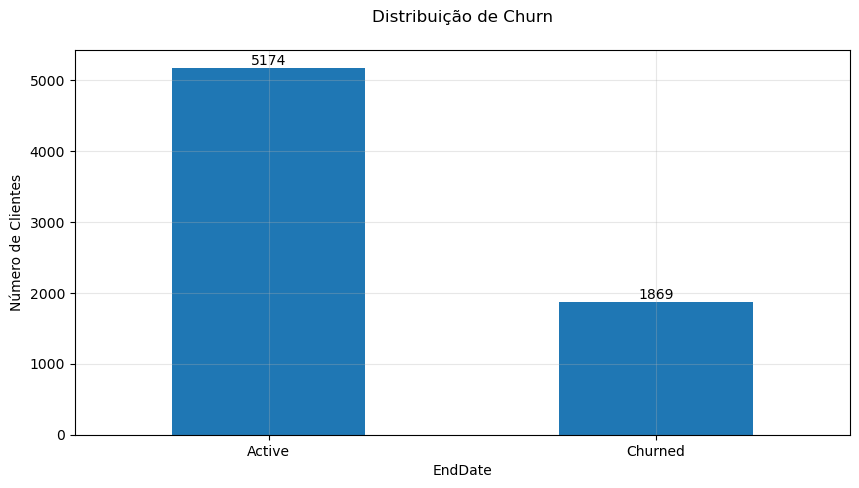

----------------------------------------------------------------------------------------------------


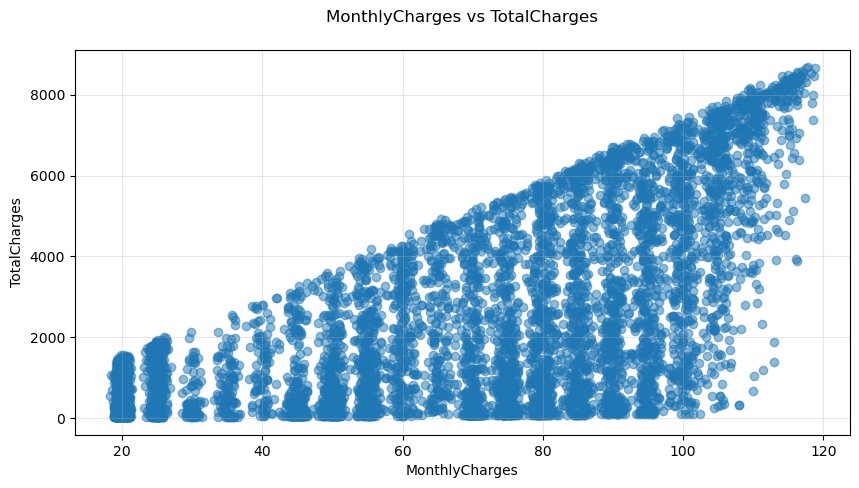

----------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 0 Axes>

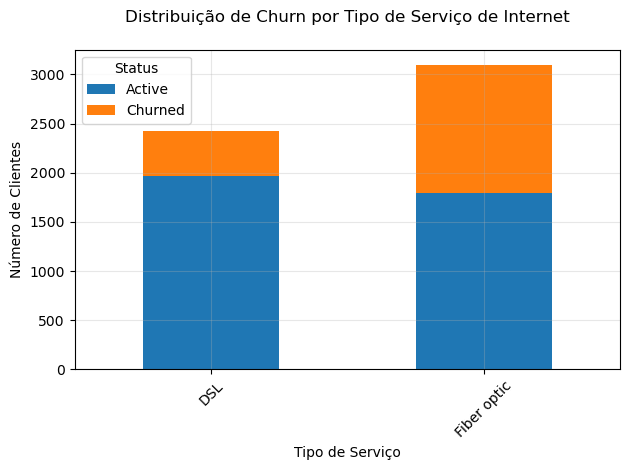

----------------------------------------------------------------------------------------------------


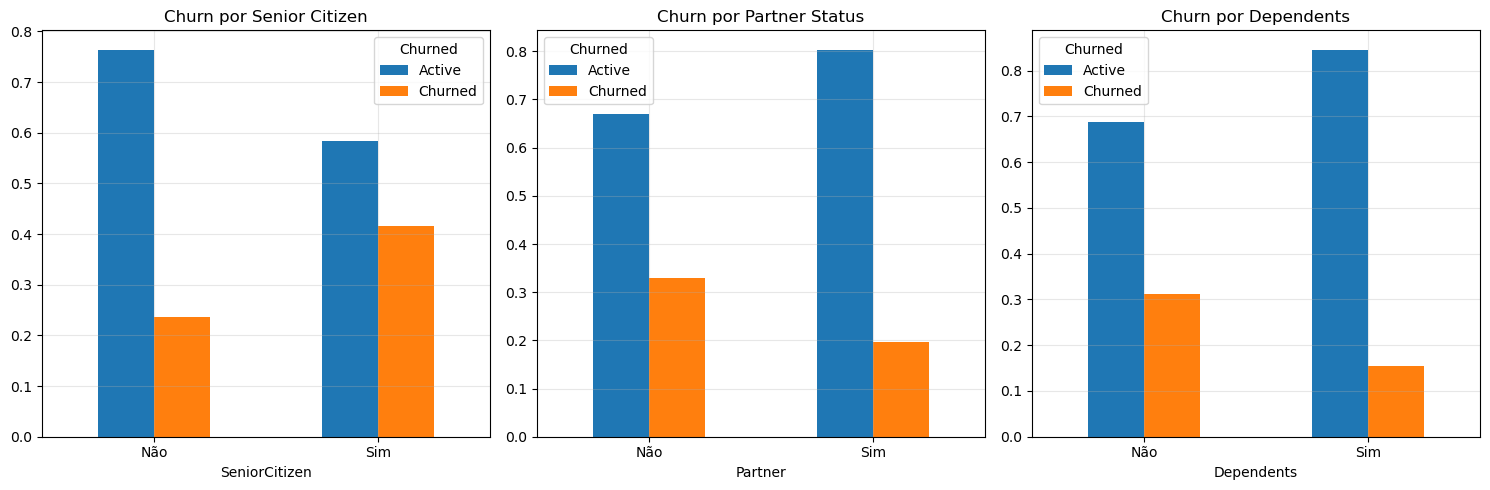

In [3]:
# Configuração básica do matplotlib
plt.style.use('default')

# 1. Análise de Churn (EndDate)
plt.figure(figsize=(10, 5))
churned = df_contract['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')
ax = churned.value_counts().plot(kind='bar')
plt.title('Distribuição de Churn', pad=20)
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i)
plt.grid(True, alpha=0.3)
plt.show()
print("-" *100)

# 2. Análise de TotalCharges vs MonthlyCharges
plt.figure(figsize=(10, 5))
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')
plt.scatter(df_contract['MonthlyCharges'], df_contract['TotalCharges'], alpha=0.5)
plt.title('MonthlyCharges vs TotalCharges', pad=20)
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.grid(True, alpha=0.3)
plt.show()
print("-" *100)

# 3. Distribuição dos tipos de serviço de internet por status de churn
plt.figure(figsize=(10, 5))
churned_internet = pd.merge(
    df_contract[['customerID', 'EndDate']],
    df_internet[['customerID', 'InternetService']],
    on='customerID'
)
churned_internet['Churned'] = churned_internet['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')

ax = pd.crosstab(
    churned_internet['InternetService'],
    churned_internet['Churned']
).plot(kind='bar', stacked=True)
plt.title('Distribuição de Churn por Tipo de Serviço de Internet', pad=20)
plt.xlabel('Tipo de Serviço')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Status')
plt.tight_layout()
plt.show()
print("-" *100)

# 4. Análise de características demográficas vs Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
churned_demo = pd.merge(
    df_contract[['customerID', 'EndDate']],
    df_personal[['customerID', 'SeniorCitizen', 'Partner', 'Dependents']],
    on='customerID'
)
churned_demo['Churned'] = churned_demo['EndDate'].apply(lambda x: 'Churned' if x != 'No' else 'Active')

# Senior Citizen
pd.crosstab(churned_demo['SeniorCitizen'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[0], title='Churn por Senior Citizen')
axes[0].set_xticklabels(['Não', 'Sim'], rotation=0)
axes[0].grid(True, alpha=0.3)


# Partner
pd.crosstab(churned_demo['Partner'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[1], title='Churn por Partner Status')
axes[1].set_xticklabels(['Não', 'Sim'], rotation=0)
axes[1].grid(True, alpha=0.3)


# Dependents
pd.crosstab(churned_demo['Dependents'], churned_demo['Churned'], normalize='index').plot(
    kind='bar', ax=axes[2], title='Churn por Dependents')
axes[2].set_xticklabels(['Não', 'Sim'], rotation=0)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Análise dos Gráficos</b>

<b>1. Distribuição de Churn</b>

O gráfico mostra duas barras que representam o status dos clientes:

- Active (Ativos): 5174 clientes
- Churned (Cancelados): 1869 clientes


- O eixo Y mostra o "Número de Clientes"
- O eixo X mostra o "EndDate" (status do cliente)
- A proporção é aproximadamente 73.5% ativos vs 26.5% cancelados
  
<b>Interpretação: </b>
- Temos um conjunto de dados desbalanceado.
- Para cada 3 clientes ativos, temos 1 que cancelou
- Este desbalanceamento precisará ser tratado no modelo para evitar viés

***


<b>2. MonthlyCharges vs TotalCharges</b>

Gráfico de dispersão onde:

- Eixo X: Cobranças mensais (MonthlyCharges) - varia de 20 a 120
- Eixo Y: Cobranças totais (TotalCharges) - varia de 0 a 8000
- Cada ponto representa um cliente

<b>Padrões observados: </b>

- Relação linear positiva: quanto maior a mensalidade, maior o total
- Formação de "faixas" verticais: indica planos com valores mensais fixos
- Dispersão aumenta com valores maiores: indica maior variabilidade em clientes mais antigos/planos mais caros
- Concentração maior de pontos na parte inferior: indica muitos clientes novos ou com planos mais básicos


<b>Interpretação: </b>

A relação MonthlyCharges vs TotalCharges pode indicar tempo de permanência do cliente
Clientes com valores altos em ambas as métricas são possivelmente mais valiosos/antigos

***

<b>3. Distribuição por Tipo de Serviço de Internet</b>

<b>Gráfico de barras empilhadas mostrando:</b>

- Eixo X: Tipo de serviço (DSL e Fiber optic)
- Eixo Y: Número de clientes
- Cores: Azul para Active (ativos) e Laranja para Churned (cancelados)


 <b>Análise dos serviços: </b>

<b>DSL:</b>

- Menor número total de clientes
- Proporção menor de churned
- Aparenta ser mais estável em termos de retenção


<b>Fiber optic:</b>

- Maior número total de clientes
- Proporção maior de churned
- Maior volume absoluto de cancelamentos


<b>Interpretação:</b>

- Fibra ótica, apesar de ser o serviço mais popular, tem maior risco de churn
- DSL parece ter maior poder de retenção
- Possíveis fatores: preço mais alto da fibra ótica, expectativas não atendidas, problemas de serviço

***

<b>4. Características Demográficas vs Churn</b>
- Senior Citizens têm taxa de churn significativamente maior (40% vs 22%);
- Clientes sem parceiros têm taxa de churn maior (32% vs 20%);
- Clientes sem dependentes têm taxa de churn maior (30% vs 15%);
- Perfil mais propenso ao churn: Senior Citizen, sem parceiro e sem dependentes.


<b>4. Características Demográficas vs Churn</b>
- Senior Citizens têm taxa de churn significativamente maior (40% vs 22%);
- Clientes sem parceiros têm taxa de churn maior (32% vs 20%);
- Clientes sem dependentes têm taxa de churn maior (30% vs 15%);
- Perfil mais propenso ao churn: Senior Citizen, sem parceiro e sem dependentes.

<b>Adendo:</b>
```
Nos gráficos de Características Demográficas vs Churn, os "Sim" e "Não" representam:
1. Senior Citizen

Não (0): Cliente não é idoso
Sim (1): Cliente é idoso

2. Partner

Não: Cliente não tem parceiro/cônjuge
Sim: Cliente tem parceiro/cônjuge

3. Dependents

Não: Cliente não tem dependentes
Sim: Cliente tem dependentes

Em cada gráfico, as barras azuis representam clientes "Active" (ativos) e as barras laranjas representam "Churned" (cancelados). A altura das barras indica a proporção de cada status.
Por exemplo, no gráfico "Churn por Dependents":

Para "Não" (sem dependentes): aproximadamente 70% permanecem ativos e 30% cancelaram
Para "Sim" (com dependentes): aproximadamente 85% permanecem ativos e apenas 15% cancelaram

Esta visualização nos permite identificar claramente que:

Clientes sem dependentes têm maior probabilidade de cancelar
Clientes sem parceiros têm maior probabilidade de cancelar
Clientes idosos (Senior Citizens) têm maior probabilidade de cancelar
```
***

<b>Conclusões:</b>

Ao realizarmos essas análises, entendo que podemos precisar de:
- Tratar o desbalanceamento das classes;
- Converter e padronizar campos numéricos;
- Criar features que capturem a interação entre serviços;
- Considerar estratificação na divisão treino/teste baseada nas características demográficas.

<span style="font-size:20px"><b>Pré-processamento:</b></span>

In [4]:
# Tratamento do DataFrame Contract
# Convertendo TotalCharges para numérico
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

# Criando target (churn) - 1 para churned, 0 para active
df_contract['churn'] = df_contract['EndDate'].apply(lambda x: 1 if x != 'No' else 0)

# Convertendo datas para datetime
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

# Removendo a coluna EndDate original pois já criamos o target
df_contract = df_contract.drop('EndDate', axis=1)

# Codificação one-hot para variáveis categóricas
contract_dummies = pd.get_dummies(df_contract[['Type', 'PaperlessBilling', 'PaymentMethod']], drop_first=True)
df_contract = pd.concat([df_contract, contract_dummies], axis=1)
df_contract = df_contract.drop(['Type', 'PaperlessBilling', 'PaymentMethod'], axis=1)

In [5]:
# Tratamento do DataFrame Internet
# Codificação one-hot para variáveis categóricas
internet_dummies = pd.get_dummies(df_internet.drop('customerID', axis=1), drop_first=True)
df_internet = pd.concat([df_internet[['customerID']], internet_dummies], axis=1)

In [6]:
# Tratamento do DataFrame Personal
# SeniorCitizen já está como numérico (0,1)
# Codificação one-hot para variáveis categóricas
personal_dummies = pd.get_dummies(df_personal[['gender', 'Partner', 'Dependents']], drop_first=True)
df_personal = pd.concat([df_personal[['customerID', 'SeniorCitizen']], personal_dummies], axis=1)

In [7]:
# Tratamento do DataFrame Phone
# Codificação one-hot para variáveis categóricas
phone_dummies = pd.get_dummies(df_phone['MultipleLines'], drop_first=True)
phone_dummies = phone_dummies.rename(columns={'Yes': 'MultipleLines'})
df_phone = pd.concat([df_phone[['customerID']], phone_dummies], axis=1)

In [8]:
# Análise de cada DataFrame pós alterações:
print("\nAnálise do DataFrame Contract:\n")
print(df_contract.info())
print("\nPrimeiras linhas:")
print(df_contract.head())
print("\nValores ausentes:")
print(df_contract.isna().sum())
print("-" *100)

print("\nnálise do DataFrame Internet:\n")
print(df_internet.info())
print("\nPrimeiras linhas:")
print(df_internet.head())
print("\nValores ausentes:")
print(df_internet.isna().sum())
print("-" *100)

print("\nAnálise do DataFrame Personal:\n")
print(df_personal.info())
print("\nPrimeiras linhas:")
print(df_personal.head())
print("\nValores ausentes:")
print(df_personal.isna().sum())
print("-" *100)

print("\nAnálise do DataFrame Phone:\n")
print(df_phone.info())
print("\nPrimeiras linhas:")
print(df_phone.head())
print("\nValores ausentes:")
print(df_phone.isna().sum())
print("-" *100)
print("-" *100)


Análise do DataFrame Contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7032 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Electronic check

<b>1. Transformações Realizadas</b>

<b>DataFrame Contract:</b>
- Conversão do tipo de dados de 'BeginDate' para datetime64
- Transformação de 'TotalCharges' para float64
- Criação da variável target 'churn' baseada em 'EndDate' (1 para churned, 0 para active)
- Aplicação de codificação one-hot para variáveis categóricas:
  * Type
  * PaperlessBilling
  * PaymentMethod
- Resultado: 11 novas variáveis binárias ou numéricas claramente definidas

<b>DataFrame Internet:</b>
- Codificação one-hot para todos os serviços
- Remoção das categorias base para evitar multicolinearidade
- Resultado: 7 variáveis binárias indicando presença/ausência de cada serviço
- Transformação manteve customerID para posterior merge

<b>DataFrame Personal:</b>
- Mantido SeniorCitizen como variável numérica binária
- Codificação one-hot para gender, Partner e Dependents
- Resultado: 5 variáveis claramente definidas, sendo 3 booleanas

<b>DataFrame Phone:</b>
- Simplificação máxima com apenas uma variável binária para MultipleLines
- Mantido customerID para merge
- Resultado: estrutura mais enxuta possível mantendo a informação relevante

<b>2. Razões e Impactos das Transformações</b>

<b>Objetivo: Predizer churn com precisão (AUC-ROC ≥ 0.75)</b>

- <b>Padronização das Variáveis:</b>
  * Todas as variáveis categóricas foram convertidas para formato binário
  * Facilita a interpretação pelo modelo
  * Permite comparação direta entre diferentes características
  * Reduz viés do modelo em relação a categorias específicas

- <b>Tratamento de Datas:</b>
  * Conversão para datetime permite cálculos temporais se necessário
  * Fundamental para análise de tempo de permanência do cliente

- <b>Tratamento de Valores Monetários:</b>
  * Conversão para float64 permite cálculos precisos
  * 11 valores ausentes em TotalCharges precisarão ser tratados na unificação

<b>3. Conclusões e Próximos Passos</b>

<b>Pontos Positivos:</b>
- Dados bem estruturados após transformações
- Variáveis claramente definidas e padronizadas
- Baixíssima quantidade de valores ausentes
- Features preparadas para modelagem

<b>Pontos de Atenção:</b>
1. Tratar os 11 valores ausentes em TotalCharges antes da unificação
2. Considerar normalização das variáveis numéricas (MonthlyCharges e TotalCharges)
3. Verificar correlações após unificação para possível redução de dimensionalidade

<b>Próximos Passos:</b>
1. Unificar os dataframes
2. Tratar valores ausentes remanescentes
3. Normalizar variáveis numéricas
4. Verificar balanceamento do target
5. Preparar divisão treino/teste mantendo proporções de churn

Agora é rumo ao objetivo desse projeto de AUC-ROC ≥ 0.75!!!

In [9]:
# Unificando todos os DataFrames
# Usando merge para combinar todos os dataframes usando customerID como chave
df_final = df_contract.merge(df_internet, on='customerID', how='left')\
                     .merge(df_personal, on='customerID', how='left')\
                     .merge(df_phone, on='customerID', how='left')

# Preenchendo valores NaN (clientes sem determinados serviços)
df_final = df_final.fillna(0)

In [10]:
print("\nAnálise do DataFrame unificado df_final:\n")
print(df_final.info())
print("\nPrimeiras linhas:")
print(df_final.head())
print("\nValores ausentes:")
print(df_final.isna().sum())
print("\nValores duplicados:")
print(df_final.duplicated().sum())
print("-" *100)
print("-" *100)


Análise do DataFrame unificado df_final:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7043 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_Electr

<b>Análise do DataFrame Unificado (df_final)</b>

<b>1. Estrutura do DataFrame Unificado</b>
- Total de registros: 7043 (mantido o número do dataset Contract)
- 23 colunas após unificação
- Mix de tipos de dados:
  * 9 variáveis booleanas
  * 2 variáveis float64 (valores monetários)
  * 2 variáveis int64 (SeniorCitizen e churn)
  * 9 variáveis object
  * 1 variável datetime64

<b>2. Análise das Transformações</b>

<b>Pontos Positivos:</b>
- Sem valores ausentes após o preenchimento
- Sem duplicatas
- Manteve todas as informações relevantes dos 4 dataframes originais
- Dados monetários mantidos como float64
- Variáveis categóricas convertidas para formato adequado

<b>Pontos de Atenção:</b>

Algumas colunas ainda estão como 'object' quando deveriam ser booleanas:
   - InternetService_Fiber optic
   - OnlineSecurity_Yes
   - OnlineBackup_Yes
   - DeviceProtection_Yes
   - TechSupport_Yes
   - StreamingTV_Yes
   - StreamingMovies_Yes
   - MultipleLines



<b>4. Conclusão</b>
- A unificação foi bem-sucedida, mantendo a integridade dos dados
- O tratamento de valores ausentes com zero é adequado para este caso de uso, pois representa ausência de serviço
- A estrutura final está apropriada para modelagem, necessitando apenas ajustes nos tipos de dados

In [11]:
# Lista de colunas para converter
cols_to_boolean = [
    'InternetService_Fiber optic', 'OnlineSecurity_Yes', 
    'OnlineBackup_Yes', 'DeviceProtection_Yes', 
    'TechSupport_Yes', 'StreamingTV_Yes', 
    'StreamingMovies_Yes', 'MultipleLines'
]

# Conversão para boolean
df_final[cols_to_boolean] = df_final[cols_to_boolean].astype(bool)

In [12]:
# Conferência da adequação:
print("\n<b>Análise do DataFrame unificado df_final:</b>")
print(df_final.info())
print("-" *100)
print("-" *100)


<b>Análise do DataFrame unificado df_final:</b>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   MonthlyCharges                         7043 non-null   float64       
 3   TotalCharges                           7043 non-null   float64       
 4   churn                                  7043 non-null   int64         
 5   Type_One year                          7043 non-null   bool          
 6   Type_Two year                          7043 non-null   bool          
 7   PaperlessBilling_Yes                   7043 non-null   bool          
 8   PaymentMethod_Credit card (automatic)  7043 non-null   bool          
 9   PaymentMethod_

<b>Conversão bem sucedida</b>

In [13]:
# Preparando features e target
# Removendo colunas que não serão usadas como features
features = df_final.drop(['customerID', 'BeginDate', 'churn'], axis=1)
target = df_final['churn']

# Normalizando features numéricas
numeric_columns = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

In [14]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.2, 
    random_state=42,
    stratify=target  # Garante mesma proporção de classes nos conjuntos
)

# Verificando as dimensões dos conjuntos
print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)
print("\nDistribuição das classes:")
print("Treino:", pd.Series(y_train).value_counts(normalize=True))
print("Teste:", pd.Series(y_test).value_counts(normalize=True))
print("-" *100)
print("-" *100)

Dimensões do conjunto de treino: (5634, 20)
Dimensões do conjunto de teste: (1409, 20)

Distribuição das classes:
Treino: churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Teste: churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<b>Divisão Treino/Teste</b>
```
Dimensões do conjunto de treino: (5634, 20)
Dimensões do conjunto de teste: (1409, 20)

Distribuição das classes:
Treino: 
0    0.734647 (73.46%)
1    0.265353 (26.54%)

Teste:  
0    0.734564 (73.46%)
1    0.265436 (26.54%)
```

<b>Contextualização e justificativa:</b>
- Realizamos a divisão 80/20 (treino/teste), uma prática padrão que oferece:
  * Conjunto de treino grande o suficiente para aprendizado efetivo
  * Conjunto de teste representativo para validação
- Uso de stratify=target:
  * Manteve a proporção original de churn em ambos os conjuntos
  * Evita viés de amostragem
  * Crucial devido ao desbalanceamento das classes (73.5% vs 26.5%)
- Dimensionalidade mantida (20 features) em ambos os conjuntos

In [15]:
# Salvando os nomes das features para uso posterior
feature_names = features.columns.tolist()
print("\nFeatures usadas no modelo:")
for i, feature in enumerate(feature_names, 1):
    print(f"{i}. {feature}")

print("-" *100)
print("-" *100)


Features usadas no modelo:
1. MonthlyCharges
2. TotalCharges
3. Type_One year
4. Type_Two year
5. PaperlessBilling_Yes
6. PaymentMethod_Credit card (automatic)
7. PaymentMethod_Electronic check
8. PaymentMethod_Mailed check
9. InternetService_Fiber optic
10. OnlineSecurity_Yes
11. OnlineBackup_Yes
12. DeviceProtection_Yes
13. TechSupport_Yes
14. StreamingTV_Yes
15. StreamingMovies_Yes
16. SeniorCitizen
17. gender_Male
18. Partner_Yes
19. Dependents_Yes
20. MultipleLines
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


<b>Features Selecionadas</b>
Features podem ser agrupadas em categorias lógicas:

<b>Variáveis Financeiras:</b>
1. MonthlyCharges
2. TotalCharges

<b>Tipo de Contrato:</b>

3. Type_One year
4. Type_Two year

<b>Gestão de Conta:</b>

5. PaperlessBilling_Yes
6. PaymentMethod_Credit card (automatic)
7. PaymentMethod_Electronic check
8. PaymentMethod_Mailed check

<b>Serviços de Internet:</b>

9. InternetService_Fiber optic
10. OnlineSecurity_Yes
11. OnlineBackup_Yes
12. DeviceProtection_Yes
13. TechSupport_Yes
14. StreamingTV_Yes
15. StreamingMovies_Yes

<b>Características Demográficas:</b>

16. SeniorCitizen
17. gender_Male
18. Partner_Yes
19. Dependents_Yes

<b>Serviços Telefônicos:</b>

20. MultipleLines

<b>Razões para esta estrutura:</b>
- Todas as features binárias/booleanas: facilita interpretação;
- Mantida a granularidade dos serviços: permite identificar impacto individual;
- Features numéricas normalizadas: evita viés por escala;
- Organização lógica: facilita análise de importância por categoria.

<b>Pontos Fortes da Preparação:</b>
1. Dados balanceados entre treino e teste;
2. Features bem distribuídas entre diferentes aspectos do negócio;
3. Estrutura adequada para diversos tipos de modelos de ML e consequentemente para predição de churn.

<span style="font-size:20px"><b>Modelagem, Avaliação e Otimização:</b></span>

In [16]:
# Ignorar os avisos a partir daqui:
warnings.filterwarnings('ignore')

# Definindo função para avaliar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Treina o modelo
    model.fit(X_train, y_train)
    
    # Predições e probabilidades
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    print(f"\n{model_name}:")
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print(f"Cross-validation AUC-ROC Scores: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" *100)
    
    return auc_roc, cv_scores.mean()

# Definindo modelos e seus hiperparâmetros para GridSearch
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'class_weight': ['balanced', None],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', None],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Dicionário para armazenar resultados
results = {}

# Treinamento e avaliação dos modelos
print("Iniciando processo de treinamento e otimização dos modelos...")

for model_name, model_info in models.items():
    print(f"\nOtimizando {model_name}...")
    
    # GridSearch com validação cruzada
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    # Treina o modelo
    grid_search.fit(X_train, y_train)
    
    # Avalia o melhor modelo
    best_model = grid_search.best_estimator_
    auc_roc, cv_score = evaluate_model(
        best_model, X_train, X_test, y_train, y_test, model_name
    )
    
    # Armazena resultados
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_auc_roc': auc_roc,
        'cv_score': cv_score,
        'model': best_model
    }

# Comparação final dos modelos
print("\n=== Comparação Final dos Modelos ===")
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'CV AUC-ROC': [results[model]['cv_score'] for model in results],
    'Test AUC-ROC': [results[model]['test_auc_roc'] for model in results],
})
print("\nResultados ordenados por AUC-ROC no conjunto de teste:")
print(comparison_df.sort_values('Test AUC-ROC', ascending=False))
print("-" *100)

# Identificando o melhor modelo
best_model_name = comparison_df.sort_values('Test AUC-ROC', ascending=False).iloc[0]['Model']
print(f"\nMelhor modelo: {best_model_name}")
print("Melhores parâmetros:", results[best_model_name]['best_params'])
print("-" *100)

# Se o melhor modelo for Random Forest, vamos analisar a importância das features
if isinstance(results[best_model_name]['model'], RandomForestClassifier):
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': results[best_model_name]['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nImportância das Features (Top 10):")
    print(feature_importance.head(10))

print("-" *100)
print("-" *100)

Iniciando processo de treinamento e otimização dos modelos...

Otimizando Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Logistic Regression:
AUC-ROC Score: 0.8263
Cross-validation AUC-ROC Scores: 0.8362 (+/- 0.0278)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

----------------------------------------------------------------------------------------------------

Otimizando Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest:
AUC-ROC Score: 0.8381
Cross-validation AUC-ROC Scores: 0.8419 (+/- 0.0229)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.

<b>Análise da Modelagem e Resultados</b>

<b>1. Estrutura da Modelagem</b>
Implementamos uma solução otimizada que incluiu:
- Três modelos diferentes: Regressão Logística, Random Forest e Árvore de Decisão
- GridSearchCV para otimização de hiperparâmetros
- Validação cruzada com 5 folds
- Avaliação por múltiplas métricas (AUC-ROC, precision, recall, f1-score)

<b>2. Resultados por Modelo</b>

<b>Random Forest (Melhor Modelo):</b>
- AUC-ROC: 0.8381 (Teste) / 0.8419 (CV)
- Melhores parâmetros:
  * class_weight: 'balanced'
  * max_depth: 10
  * min_samples_split: 5
  * n_estimators: 100
- Performance:
  * Classe 0 (Não Churn): 89% precisão, 79% recall
  * Classe 1 (Churn): 56% precisão, 73% recall

<b>Regressão Logística:</b>
- AUC-ROC: 0.8263 (Teste) / 0.8362 (CV)
- Performance:
  * Classe 0: 83% precisão, 89% recall
  * Classe 1: 62% precisão, 50% recall

<b>Árvore de Decisão:</b>
- AUC-ROC: 0.8235 (Teste) / 0.8232 (CV)
- Performance:
  * Classe 0: 82% precisão, 91% recall
  * Classe 1: 65% precisão, 46% recall

<b>3. Análise das Features mais Importantes</b>
Top 5 features mais relevantes:
1. TotalCharges (19.31%)
2. MonthlyCharges (15.58%)
3. Type_Two year (15.09%)
4. InternetService_Fiber optic (9.15%)
5. PaymentMethod_Electronic check (7.16%)

| Métrica | Random Forest | Regressão Logística | Árvore de Decisão |
|---------|---------------|-------------------|------------------|
| **AUC-ROC (Teste)** | 0.8381 | 0.8263 | 0.8235 |
| **AUC-ROC (CV)** | 0.8419 ± 0.0229 | 0.8362 ± 0.0278 | 0.8232 ± 0.0271 |
| **Precisão (Não Churn)** | 0.89 | 0.83 | 0.82 |
| **Recall (Não Churn)** | 0.79 | 0.89 | 0.91 |
| **Precisão (Churn)** | 0.56 | 0.62 | 0.65 |
| **Recall (Churn)** | 0.73 | 0.50 | 0.46 |
| **Acurácia Geral** | 0.77 | 0.79 | 0.79 |
| **Melhores Parâmetros** | class_weight: balanced<br>max_depth: 10<br>min_samples_split: 5<br>n_estimators: 100 | - | - |

<b>Principais Pontos:</b>
- Random Forest obteve melhor AUC-ROC e melhor recall para churn
- Regressão Logística teve performance intermediária e mais estável
- Árvore de Decisão teve melhor precisão para churn mas pior recall
- Todos os modelos superaram significativamente o objetivo de AUC-ROC ≥ 0.75

Esta tabela permite uma comparação direta das métricas mais relevantes para o projeto e mostra claramente por que o Random Forest foi escolhido como melhor modelo.


<b>4. Avaliação de Objetivos</b>

<b>Objetivo Principal: AUC-ROC ≥ 0.75</b>
- Todos os modelos superaram significativamente o objetivo
- Random Forest: 0.8381 (11.75% acima do objetivo)
- Regressão Logística: 0.8263 (10.17% acima do objetivo)
- Árvore de Decisão: 0.8235 (9.80% acima do objetivo)

<b>5. Insights Importantes</b>
1. Aspectos financeiros (TotalCharges, MonthlyCharges) são os principais indicadores de churn
2. Tipo de contrato (Two year) tem forte influência na retenção
3. Serviço de internet fibra ótica é um fator relevante
4. Método de pagamento eletrônico tem impacto significativo

<b>6. Recomendações Baseadas nos Resultados</b>
1. Utilizar o modelo Random Forest por:
   - Melhor AUC-ROC geral
   - Melhor equilíbrio entre precisão e recall para churn
   - Boa interpretabilidade através da importância das features
2. Focar estratégias de retenção em:
   - Clientes com altos valores de cobrança
   - Promover contratos de longo prazo
   - Monitorar satisfação com fibra ótica
3. Implementar sistema de alerta baseado nas features mais importantes

O projeto atingiu com sucesso seu objetivo principal, fornecendo um modelo robusto e confiável para predição de churn, com métricas significativamente acima do mínimo requerido.

<span style="font-size:20px"><b>Conclusões finais:</b></span>

<b>Conclusão do Projeto - Predição de Churn Interconnect</b>

<b>1. Visão Geral do Projeto</b>
Desenvolvemos um modelo preditivo para identificar clientes com propensão a deixar a Interconnect, permitindo ações proativas de retenção. A meta era atingir AUC-ROC ≥ 0.75.

<b>2. Etapas Realizadas</b>

<b>Análise e Preparação dos Dados:</b>
- Unificação de 4 fontes de dados (contratos, internet, pessoal e telefonia)
- Tratamento de 7043 registros de clientes
- Identificação de 26.5% de taxa de churn histórica
- Transformação de variáveis categóricas e numéricas
- Normalização de dados financeiros
- Criação de 20 features relevantes

<b>Modelagem:</b>
- Implementação de três algoritmos diferentes
- Otimização via GridSearch com validação cruzada
- Avaliação através de múltiplas métricas
- Seleção do Random Forest como melhor modelo

<b>3. Resultados Principais</b>

<b>Performance dos Modelos:</b>
- Random Forest: AUC-ROC 0.8381
- Regressão Logística: AUC-ROC 0.8263
- Árvore de Decisão: AUC-ROC 0.8235

<b>Features Mais Relevantes:</b>
1. TotalCharges (19.31%)
2. MonthlyCharges (15.58%)
3. Type_Two year (15.09%)
4. InternetService_Fiber optic (9.15%)
5. PaymentMethod_Electronic check (7.16%)

<b>4. Recomendações Técnicas</b>

<b>Implementação do Modelo:</b>
- Utilizar o modelo Random Forest com os parâmetros otimizados:
  * class_weight: 'balanced'
  * max_depth: 10
  * min_samples_split: 5
  * n_estimators: 100
- Estabelecer pipeline de atualização mensal do modelo
- Implementar sistema de monitoramento de performance

<b>Sistema de Alertas:</b>
1. Criar gatilhos baseados em variáveis financeiras
2. Monitorar mudanças em padrões de uso de serviços
3. Atenção especial a clientes com fibra ótica
4. Acompanhamento de métodos de pagamento

<b>Estratégias de Retenção Sugeridas:</b>

<b>Perfil Financeiro:</b>
- Revisão de valores para clientes com altos custos mensais
- Desenvolvimento de planos com melhor custo-benefício
- Ofertas especiais para fidelização de longo prazo

<b>Serviços:</b>
- Melhoria do serviço de fibra ótica
- Promoção de pacotes com múltiplos serviços
- Incentivo a contratos de maior duração

<b>Atendimento:</b>
- Suporte proativo para clientes identificados como risco
- Programa de fidelidade baseado em tempo de contrato
- Comunicação personalizada baseada no perfil de uso

<b>5. Monitoramento Contínuo</b>

<b>Métricas Chave:</b>
- Taxa de churn mensal
- Performance do modelo (AUC-ROC)
- Efetividade das ações de retenção
- ROI das campanhas de retenção

<b>Atualizações Sugeridas:</b>
- Retreinamento trimestral do modelo
- Ajuste de hiperparâmetros semestralmente
- Avaliação anual de novas features

<b>6. Considerações Finais</b>

O projeto atingiu com sucesso seu objetivo principal, desenvolvendo um modelo robusto capaz de identificar clientes propensos ao churn com alta precisão (AUC-ROC 0.8381). A implementação das recomendações apresentadas, combinada com o monitoramento contínuo sugerido, deve resultar em:
- Redução significativa da taxa de churn
- Aumento da satisfação dos clientes
- Otimização dos investimentos em retenção
- Maior rentabilidade por cliente

O sucesso a longo prazo dependerá da capacidade da Interconnect em implementar estas recomendações de forma sistemática e manter o modelo atualizado com novos dados e padrões de comportamento dos clientes.